In [2]:
from src.neurons import *
from src.networks import *
import numpy
import matplotlib.pyplot as plt

In [3]:
from matplotlib import rc
from matplotlib import rcParams
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rcParams['font.family'] = 'Times New Roman'

# Experiment Background
Displaying training set:

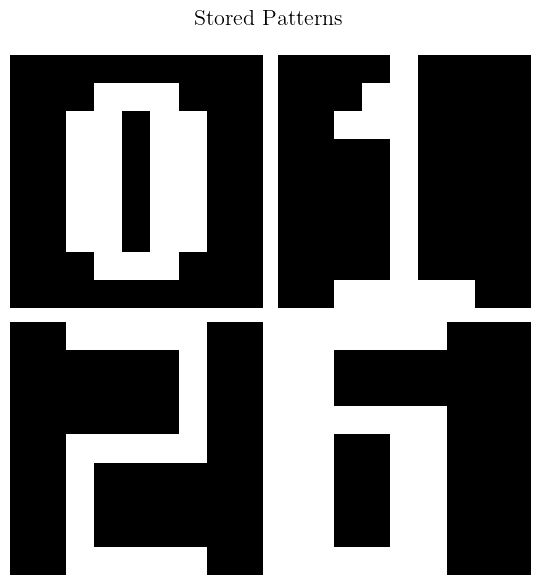

In [4]:
plt.figure(figsize=(5.5, 6))
plt.suptitle('Stored Patterns', fontsize=16)

plt.subplot(2, 2, 1)
plt.imshow(ZERO, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(ONE, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(TWO, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(SIX, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

Displaying testing set:

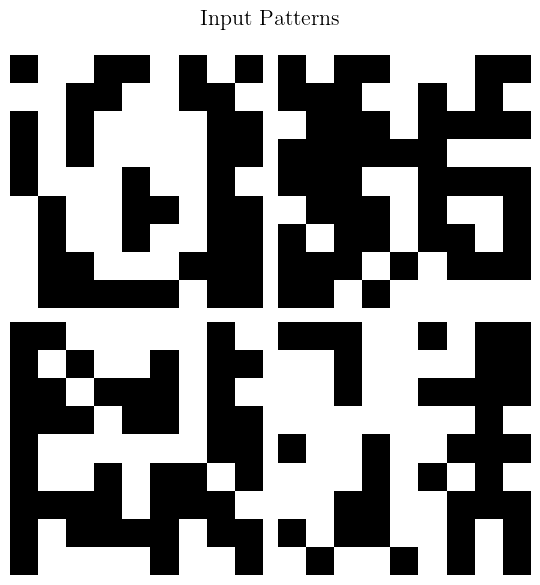

In [5]:
plt.figure(figsize=(5.5, 6))
plt.suptitle('Input Patterns', fontsize=16)
plt.subplot(2, 2, 1)
plt.imshow(INPUT_ZERO, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(INPUT_ONE, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(INPUT_TWO, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(INPUT_SIX, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

# Parameters


In [6]:
size:int = 9
label = np.array([ZERO,ONE,TWO,SIX])

input = INPUT_SIX

# parameters:
# MIZH: iter = 250, dt = 0.04, eta = 1.500
# IZH: iter = 250, dt = 0.04, eta = 1.000
# HH: iter = 5000, dt = 0.002, eta = 2.1
# LIF: iter = 1000, dt = 0.01, eta = 0.5
mizh_param = (250, 0.04, 1.500, NEURON_TYPE.MIZH)
izh_param = (250, 0.04, 1.000, NEURON_TYPE.IZH)
hh_param = (5000, 0.002, 2.1, NEURON_TYPE.HH)
lif_param = (1000, 0.01, 0.5, NEURON_TYPE.LIF)

param = izh_param

iter = param[0]
dt = param[1]
eta = param[2]
model_type = param[3]

model = network(size=size, iter=iter, eta=eta, dt = dt)
model.train(label)

# get the predict results
y0,e0,_,_,_, spike_indices_0, spike_times_0 = model.predict(INPUT_ZERO, model_type)
y1,e1,_,_,_, spike_indices_1, spike_times_1 = model.predict(INPUT_ONE, model_type)
y2,e2,_,_,_, spike_indices_2, spike_times_2 = model.predict(INPUT_TWO, model_type)
y6,e6,monitor_iext,monitor_v, monitor_i, spike_indices_6, spike_times_6 = model.predict(INPUT_SIX, model_type)


# Results

Retrival

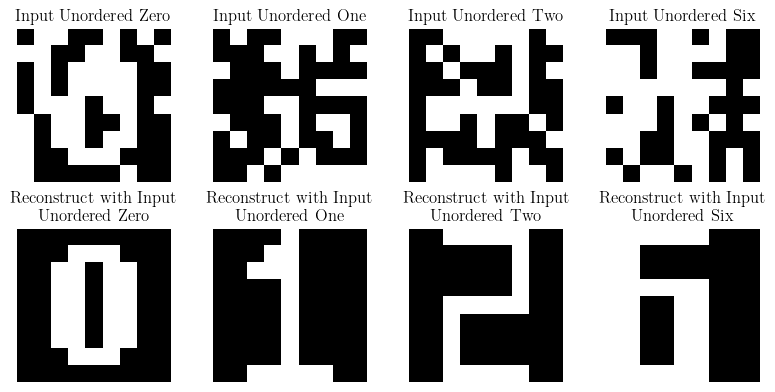

In [7]:
# show the result graphes
plt.figure(figsize=(8, 4))

# Input images
plt.subplot(2, 4, 1)
plt.imshow(INPUT_ZERO, cmap='gray')
plt.axis('off')
plt.title("Input Unordered Zero")

plt.subplot(2, 4, 2)
plt.imshow(INPUT_ONE, cmap='gray')
plt.axis('off')
plt.title("Input Unordered One")

plt.subplot(2, 4, 3)
plt.imshow(INPUT_TWO, cmap='gray')
plt.axis('off')
plt.title("Input Unordered Two")

plt.subplot(2, 4, 4)
plt.imshow(INPUT_SIX, cmap='gray')
plt.axis('off')
plt.title("Input Unordered Six")

# Output images
plt.subplot(2, 4, 5)
plt.imshow(y0, cmap='gray')
plt.axis('off')
plt.title("Reconstruct with Input\nUnordered Zero")

plt.subplot(2, 4, 6)
plt.imshow(y1, cmap='gray')
plt.axis('off')
plt.title("Reconstruct with Input\nUnordered One")

plt.subplot(2, 4, 7)
plt.imshow(y2, cmap='gray')
plt.axis('off')
plt.title("Reconstruct with Input\nUnordered Two")

plt.subplot(2, 4, 8)
plt.imshow(y6, cmap='gray')
plt.axis('off')
plt.title("Reconstruct with Input\nUnordered Six")

plt.tight_layout()
plt.show()

Monitoring a neuron from input pattern 6

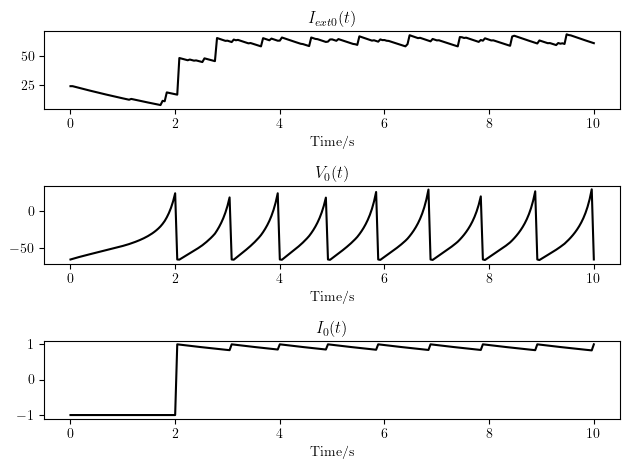

In [8]:
plt.figure()
x_values = np.arange(0, len(monitor_i)) * dt
# print(len(x_values))
# print(len(monitor_i))
plt.subplot(3,1,1)
plt.plot(x_values, monitor_iext, color='black')
plt.xlabel('Time/s')
plt.title(r'$I_{ext0}(t)$')
plt.subplot(3,1,2)
plt.plot(x_values, monitor_v, color='black')
plt.xlabel('Time/s')
plt.title('$V_0(t)$')
plt.subplot(3,1,3)
plt.plot(x_values, monitor_i, color='black')
plt.xlabel('Time/s')
plt.title(r'$I_{0}(t)$')
plt.tight_layout()
plt.show()

Spiking Network

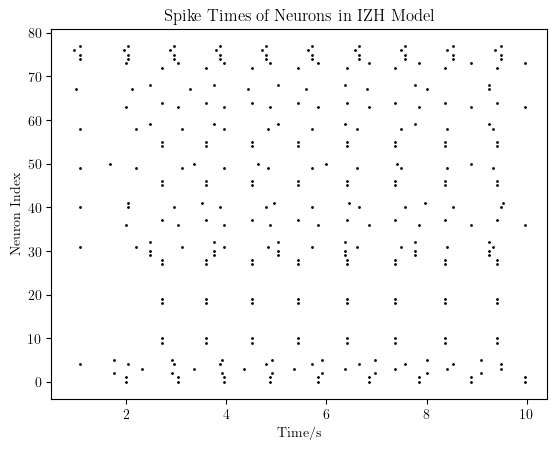

In [9]:

plt.figure()
plt.scatter(spike_times_6, spike_indices_6, s=1, color='black')
plt.title(f'Spike Times of Neurons in {model_type.name} Model')
plt.xlabel('Time/s')
plt.ylabel('Neuron Index')
plt.show()